In [16]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

events_df = pd.read_csv('timeseries_events.csv')
users_df = pd.read_csv('timeseries_users.csv')

Text(0.5, 1.0, 'events for male users > or equal to age of 30')

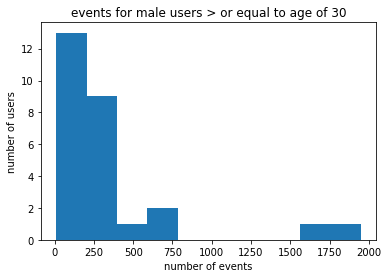

In [2]:
# Question A:
# create filter and get ids of users that are > than or equal to 30 and male. 
age_filter = users_df['age']>=30
gender_filter = users_df['gender'] == 'm'
final_filter = age_filter & gender_filter

# sum events for each user
event_counts = events_df['user_id'].value_counts().sort_index()

# filter events based on gender and age filter
final_counter = event_counts * final_filter
final_counter = final_counter[(~final_counter.isnull()) & ~(final_counter == 0)]

# plot histogram with proper labels
plt.hist(final_counter)
plt.xlabel('number of events')
plt.ylabel('number of users')
plt.title('events for male users > or equal to age of 30')

Text(0.5, 1.0, 'distribution of event log times for users')

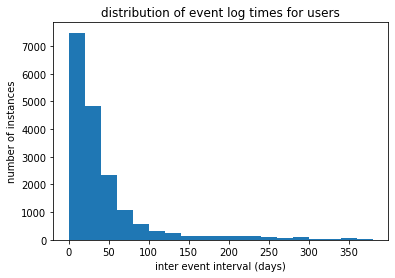

In [120]:
# Question B: 
# convert date column to pandas datetime format
events_df['event_date'] = pd.to_datetime(events_df['event_date'])

# calculate inter event interval for each event logged. 
# note that events are unsorted logged resulting in negative days between events. These values have been removed. 
iei_tracker = []
for i in set(events_df['user_id']):
    raw_diff = events_df[events_df['user_id'] == i]['event_date'].diff()  
    iei_tracker += list(raw_diff[raw_diff.astype('timedelta64[D]')>0].astype('timedelta64[D]').values)

# plot histogram using 20 day bins
plt.hist(iei_tracker, bins = np.arange(0,400,20) )
plt.xlabel('inter event interval (days)')
plt.ylabel('number of instances')
plt.title('distribution of event log times for users')
              